In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
from timeit import default_timer as timer
import os
import altair as alt
alt.renderers.enable('notebook')

sns.set(style="darkgrid")
%matplotlib inline

In [67]:
data_path = os.path.abspath('../../../../../data/analysis/')
file = os.path.join(data_path, 'R0_VH_R1aafreq.csv')
df = pd.read_csv(file)



R0_VH_S1_L001_R1_001aafreq.csv 	 12.949009  Mb


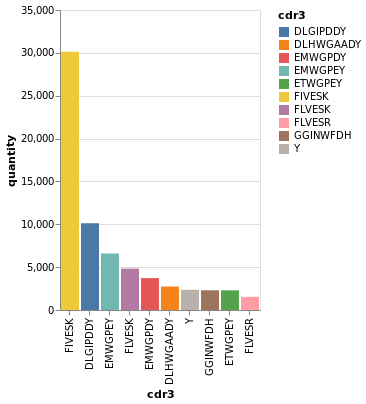

R1a_VH_S2_L001_R1_001aafreq.csv 	 4.31981  Mb


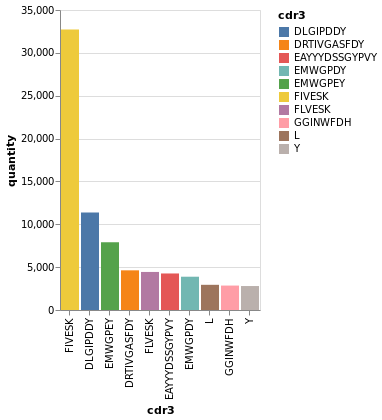

R1b_VH_S3_L001_R1_001aafreq.csv 	 3.915443  Mb


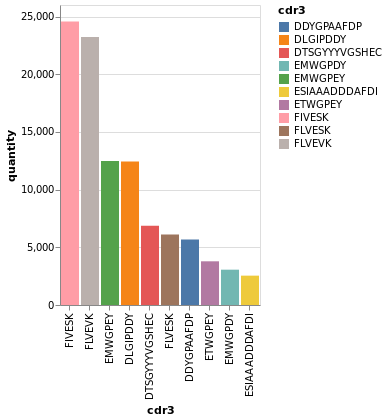

R2a_VH_S4_L001_R1_001aafreq.csv 	 1.769192  Mb


R2b_VH_S5_L001_R1_001aafreq.csv 	 2.101786  Mb


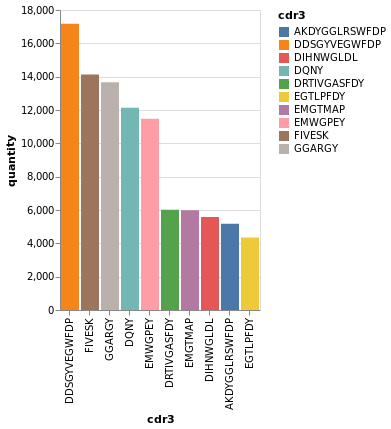

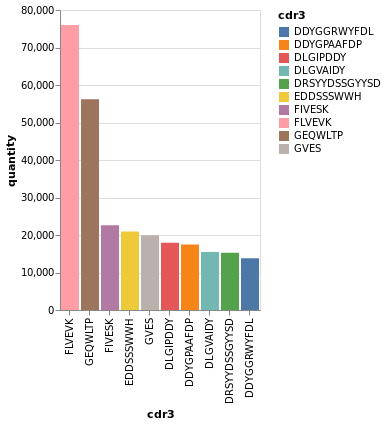

R3a_VH_S6_L001_R1_001aafreq.csv 	 1.111353  Mb


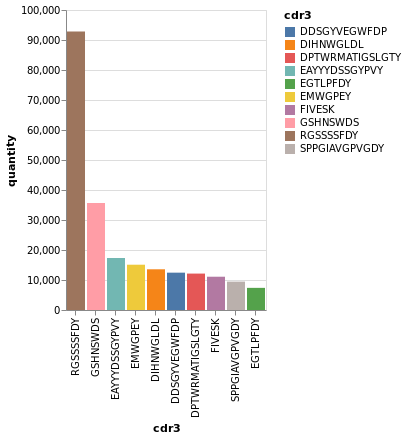

R3b_VH_S7_L001_R1_001aafreq.csv 	 1.005433  Mb


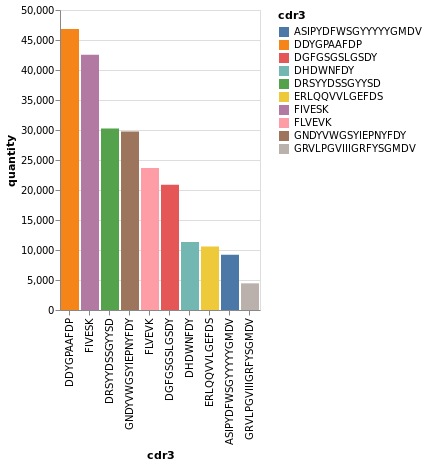

R4a_VH_S8_L001_R1_001aafreq.csv 	 0.993408  Mb


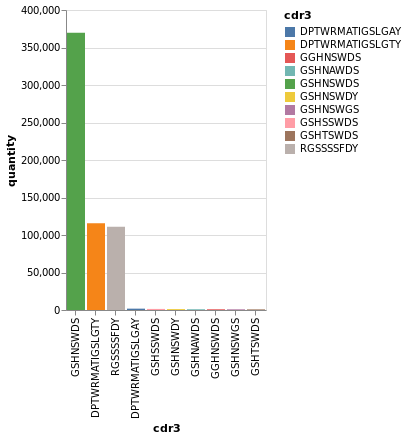

R4b_VH_S9_L001_R1_001aafreq.csv 	 0.171737  Mb


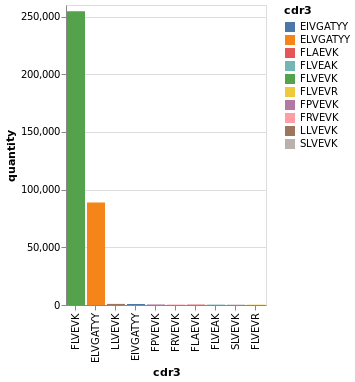

R5b_VH_S10_L001_R1_001aafreq.csv 	 0.225096  Mb


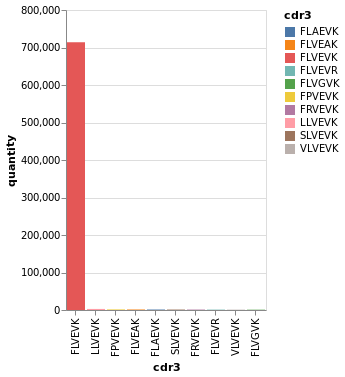

In [71]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and 'VH' in f and f.startswith('R') and 'S' in f:
        print(f, '\t', str((os.path.getsize(os.path.join(data_path, f))/1000000)), ' Mb')
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white').display();
        

VCL29VHR3_S3_L001_R1_001aafreq.csv 	 0.320142  Mb


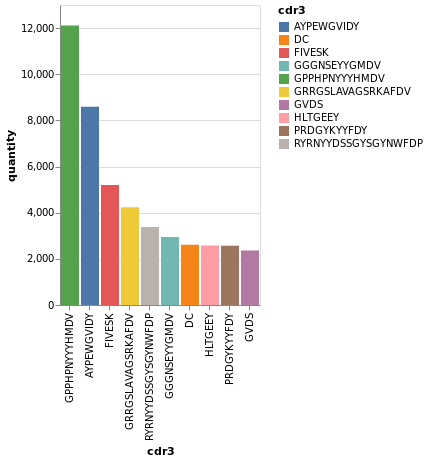

VCL29VHR4_S4_L001_R1_001aafreq.csv 	 0.368886  Mb


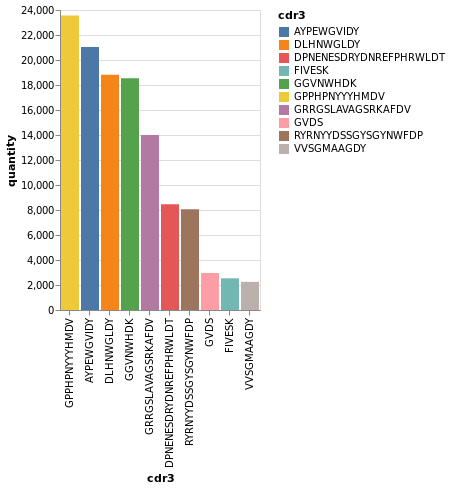

VCL66VHR3_S7_L001_R1_001aafreq.csv 	 0.451531  Mb


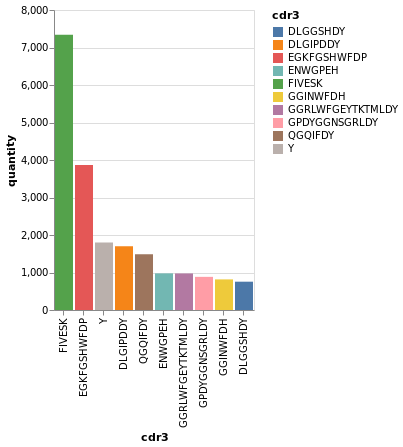

VCL66VHR4_S8_L001_R1_001aafreq.csv 	 1.969706  Mb


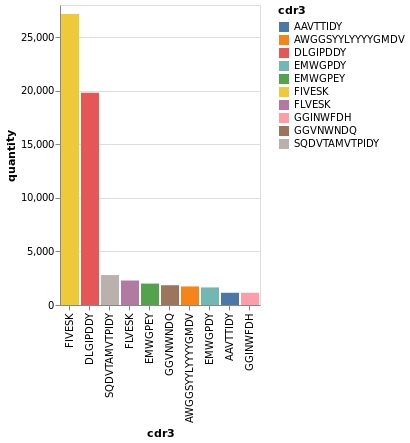

In [73]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and 'VH' in f and 'VCL' in f and os.path.getsize(os.path.join(data_path, f))/1000 > 10 and not 'sync' in f:
        print(f, '\t', str((os.path.getsize(os.path.join(data_path, f))/1000000)), ' Mb')
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        alt.Chart(cdr_top_10).mark_bar().encode(alt.X('cdr3', sort=alt.EncodingSortField(field="quantity", op="count", order='ascending')), y='quantity', color=alt.Color('cdr3', sort=list(cdr_top_10['cdr3'].sort_values()))).configure(background='white').display();

## Perguntas

- Esses dados estão corretos?
- O que cada uma dessas duas bibliotecas está testando?
- Se estiver no caminho certo, qual o próximo passo?

In [90]:
for f in sorted(os.listdir(data_path)):
    if f.endswith('csv') and 'VH' in f and f.startswith('R') and 'S' in f:
        print(f, '\t', str((os.path.getsize(os.path.join(data_path, f))/1000000)), ' Mb')
        df = pd.read_csv(os.path.join(data_path, f))
        cdr_top_10 = df.sort_values(by='quantity', ascending=False)[:10]
        print(cdr_top_10.loc[:,['cdr3', 'quantity', 'aromatic', 'positive', 'length']])
        print('\n\n')
        

R0_VH_S1_L001_R1_001aafreq.csv 	 12.949009  Mb
          cdr3  quantity  aromatic  positive  length
0       FIVESK     30123         1         1       6
1     DLGIPDDY     10108         1         0       8
2      EMWGPEY      6600         2         0       7
8       FLVESK      4829         1         1       6
5      EMWGPDY      3720         2         0       7
11   DLHWGAADY      2737         2         1       9
181          Y      2359         1         0       1
3     GGINWFDH      2302         2         1       8
9      ETWGPEY      2294         2         0       7
13      FLVESR      1536         1         1       6



R1a_VH_S2_L001_R1_001aafreq.csv 	 4.31981  Mb
             cdr3  quantity  aromatic  positive  length
0          FIVESK     32734         1         1       6
1        DLGIPDDY     11372         1         0       8
4         EMWGPEY      7908         2         0       7
2     DRTIVGASFDY      4628         2         1      11
24         FLVESK      4440         1    